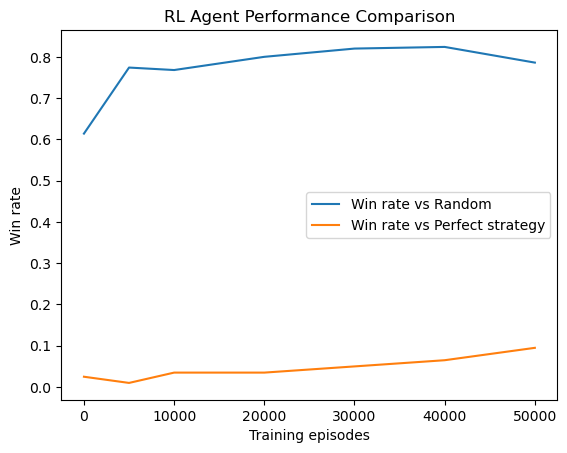

In [1]:
import train
import eval
import matplotlib.pyplot as plt
from agents import PerfectAgent
from ttt_env import TicTacToeEnv

training_steps = [0, 5000, 10000, 20000, 30000, 40000, 50000]

win_random = []
win_perfect = []

env = TicTacToeEnv()
perfect = PerfectAgent()

for steps in training_steps:
    agent = train.train(steps)

    # vs RandomAgent
    wins, draws, losses = eval.evaluate(agent, 500)
    win_random.append(wins / 500)

    #vs PerfectStrategy
    wins_p = 0
    for _ in range(200):
        env.reset()
        done = False

        while not done:
            action = agent.act(env.board, env.available_actions(), training=False)
            _, reward, done = env.step(action)

            if done:
                if reward == 1:
                    wins_p += 1
                break

            opp_action = perfect.act(env.board, env.available_actions())
            _, _, done = env.step(opp_action)

    win_perfect.append(wins_p / 200)

# Plot
plt.figure()
plt.plot(training_steps, win_random, label="Win rate vs Random")
plt.plot(training_steps, win_perfect, label="Win rate vs Perfect strategy")
plt.xlabel("Training episodes")
plt.ylabel("Win rate")
plt.title("RL Agent Performance Comparison")
plt.legend()
plt.show()



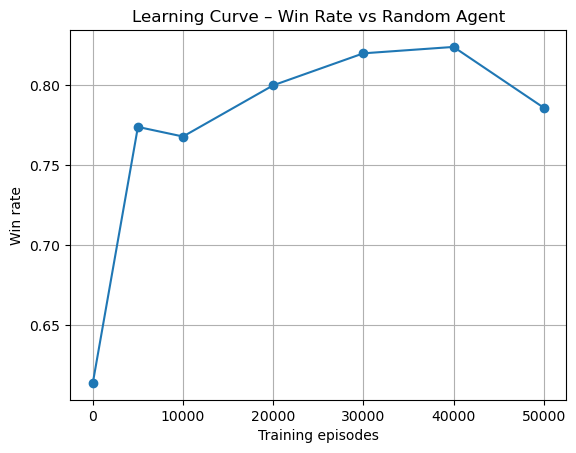

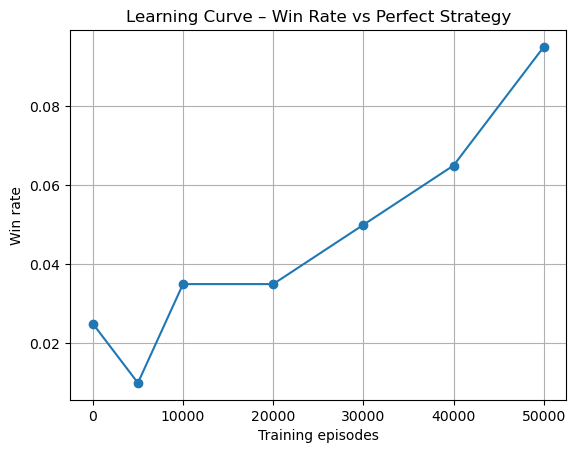

In [2]:


# --- Learning curve vs Random ---
plt.figure()
plt.plot(training_steps, win_random, marker="o")
plt.xlabel("Training episodes")
plt.ylabel("Win rate")
plt.title("Learning Curve – Win Rate vs Random Agent")
plt.grid(True)
plt.show()

# --- Learning curve vs Perfect ---
plt.figure()
plt.plot(training_steps, win_perfect, marker="o")
plt.xlabel("Training episodes")
plt.ylabel("Win rate")
plt.title("Learning Curve – Win Rate vs Perfect Strategy")
plt.grid(True)
plt.show()
